In [220]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"]=False # 正常显示负号

from pyecharts.charts import Bar, Line, Grid, Pie, Funnel
import pyecharts.options as opts

import pandas as pd
import numpy as np

def my_read_csv(name):
    return pd.read_csv('./csv/' + name + '.csv', index_col=0)

movie = my_read_csv('movie')
actor = my_read_csv('actor')
director = my_read_csv('director')
lang = my_read_csv('lang')
place = my_read_csv('place')
type = my_read_csv('type')
movie_actor = my_read_csv('movie_actor')
movie_place = my_read_csv('movie_place')
movie_director = my_read_csv('movie_director')
movie_type = my_read_csv('movie_type')


In [77]:
# sql = 'select score, count(*) count, avg(comment) avg_comment from movie group by score'
# score, count, avg = execute_sql(sql, 3)

grouped = movie.groupby('score')
count = grouped.size()
score = count.index
count = count.values
avg = grouped['comment'].mean()

count = [int(i) for i in count]
score = [str(i) for i in score]
avg = [round(i) for i in avg]


bar = (
        Bar()
        .add_xaxis(score)
        .add_yaxis('数量', count)
        .set_global_opts(
                title_opts=opts.TitleOpts(title='各评分的数量')
         )
)
line = (
        Line()
        .add_xaxis(score)
        .add_yaxis('平均评论数', avg)
        .set_global_opts(
                title_opts=opts.TitleOpts(title='各评分对应的平均评论数', pos_top='52%'),
                legend_opts=opts.LegendOpts(pos_top='52%')
        )
)

grid = (
        Grid(init_opts=opts.InitOpts(height="600px", width='1000px'))
        .add(bar, opts.GridOpts(pos_bottom='55%'))
        .add(line, opts.GridOpts(pos_top='60%'))
)
grid.render_notebook()

In [78]:
bar = (
        Bar(init_opts=opts.InitOpts(height="500px", width='1000px'))
        .add_xaxis(score)
        .add_yaxis('数量', count, yaxis_index=0, z=0,
                label_opts=opts.LabelOpts(is_show=True),
                color='MediumTurquoise')
        .extend_axis(yaxis=opts.AxisOpts(min_= 0))
        .set_global_opts(
                title_opts=opts.TitleOpts(title='评分 - 数量/平均评论数')
         )
)
line = (
        Line()
        .add_xaxis(score)
        .add_yaxis(
                '平均评论数', 
                avg, 
                yaxis_index=1, 
                symbol="circle",
                linestyle_opts=opts.LineStyleOpts(color="LimeGreen", width=4, type_="dashed"),
                itemstyle_opts=opts.ItemStyleOpts(
                        border_width=5, border_color="MediumAquamarine", color="white"
                ),
        )
        .set_global_opts(
                
        )
)
bar.overlap(line)
bar.render_notebook()
# line.render_notebook()

In [136]:
# sql =  'select p.name, count(*) count, truncate(avg(score), 2) avg_score\
#         from place p left outer join movie_place mp on p.id = mp.place_id join movie m on m.id = mp.movie_id\
#         group by p.name\
#         order by count desc'
# name, count, avg_score = execute_sql(sql, 3)

df = pd.merge(pd.merge(place, movie_place, left_on='id', right_on='place_id'), movie, left_on='movie_id', right_on='id')
df = df.groupby('name_x').agg({'name_x' : np.size, 'score' : np.mean})
df.columns = ['count', 'avg_score']
df = df.sort_values(by='count', ascending=False)

name = list(df.index)
avg_score = list(df['avg_score'].values)
count = [int(x) for x in df['count'].values]
avg_score = [round(x, 2) for x in avg_score]


bar = (
        Bar(init_opts=opts.InitOpts(height="500px", width='1000px'))
        .add_xaxis(name[:10])
        .add_yaxis('数量', count[:10], xaxis_index=0,)
        .reversal_axis()
        .extend_axis(xaxis=opts.AxisOpts(min_= min(avg_score[:10]) - 0.1))
        .set_global_opts(title_opts=opts.TitleOpts(title='各国家的入选数量', subtitle='取数量前十名'))
)

bar_add = (
        Bar()
        .add_xaxis(name)
        .add_yaxis('平均评分', avg_score[:10], xaxis_index=1)
)
bar.overlap(bar_add)
bar.render_notebook()

In [138]:
# sql =  'select t.name name, count(*) count, truncate(avg(score), 2) avg_score\
#         from type t left outer join movie_type mt on t.id = mt.type_id join movie m on m.id = mt.movie_id\
#         group by t.name \
#         order by count desc'
# name, count, avg_score = execute_sql(sql, 3)

df = pd.merge(pd.merge(type, movie_type, left_on='id', right_on='type_id'), movie, left_on='movie_id', right_on='id')
df = df.groupby('name_x').agg({'name_x' : np.size, 'score' : np.mean})
df.columns = ['count', 'avg_score']
df = df.sort_values(by='count', ascending=False)

name = list(df.index)
avg_score = list(df['avg_score'].values)
count = [int(x) for x in df['count'].values]
avg_score = [round(x, 2) for x in avg_score]

bar = (
        Bar(init_opts=opts.InitOpts(height="500px", width='1000px'))
        .add_xaxis(name)
        .add_yaxis('数量', count, category_gap="15%", yaxis_index=0,)
        # .add_yaxis('平均评分', avg_score)
        .extend_axis(yaxis=opts.AxisOpts(min_= min(avg_score) - 0.1))
        # .reversal_axis()
        .set_global_opts(
                xaxis_opts=opts.AxisOpts(
                        axislabel_opts=opts.LabelOpts(font_size=9, rotate=-30)
                ),
                
                title_opts=opts.TitleOpts(title='各类型的电影数量, 均分', subtitle=''),
                
                
        )
        
)
bar_add = (
        Bar()
        .add_xaxis(name)
        .add_yaxis('均分', avg_score, yaxis_index=1)
)
bar.overlap(bar_add)
bar.render_notebook()

In [141]:
# 导演
# sql =  'select name, count(*) count from director left join movie_director on director.id = movie_director.director_id\
#         group by name order by count desc limit 15'
# name, count = execute_sql(sql, 2)

df = pd.merge(director, movie_director, left_on='id', right_on='director_id')
df = df.groupby('name').agg({'name' : np.size})
df.columns = ['count']
df = df.sort_values(by='count', ascending=False)[:15]

name = list(df.index)
count = [int(x) for x in df['count'].values]

name.append('其他')
count.append(250 - sum(count))
pie = (
    Pie()
    .add(
        series_name='导演名',
        data_pair=[list(x) for x in zip(name, count)],
        center = ['50%', '50%'],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="TOP 250 中 各导演指导的电影数",
            pos_right='center',
        ),
        legend_opts=opts.LegendOpts(pos_left="0%",pos_top="55",orient='vertical')
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="由 {b} 指导的电影: {c}部"
        ),
        label_opts=opts.LabelOpts(formatter='{b}'),
    )
)
pie.render_notebook()

In [163]:
# 上映年代 时长时间 饼图
# sql =  'select round(year- year % 10) decade, count(*) count from movie\
#         group by decade'
# decade, count = execute_sql(sql, 2)

df = movie.copy(deep=True)
df['year'] -= df['year'] % 10
df = df.rename(columns={'year':'decade'})
df = df.groupby('decade').agg({'decade':np.size})
df.columns = ['count']
decade = [str(x) + '年代' for x in list(df.index)]
count = [int(x) for x in df['count'].values]


pie = (
    Pie()
    .add(
        series_name='上映年代',
        data_pair=[list(x) for x in zip(decade, count)],
        center = ['28%', '50%'],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="不同年代上映的电影数量",
            
        ),
        legend_opts=opts.LegendOpts(pos_left="0%",pos_top="55",orient='vertical')
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a}在{b}的电影: {c}部"
        ),
        label_opts=opts.LabelOpts(formatter='{b}'),
    )
)


# sql =  'select (length-length%10) segment , count(*) from movie \
#         group by segment order by segment'
# segment, count_ = execute_sql(sql, 2)


df = movie.copy(deep=True)
df['length'] -= df['length'] % 10
df = df.rename(columns={'length':'segment'})
df = df.groupby('segment').agg({'segment':np.size})
df.columns = ['count']
segment = ['[' + str(x) + ',' + str(x + 10) + ')' for x in list(df.index)]
count_ = [int(x) for x in df['count'].values]



pie_add = (
    Pie()
    .add(
        series_name='电影时长',
        data_pair=[list(x) for x in zip(segment, count_)],
        center = ['73%', '50%'],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="不同时长的电影数量",
            pos_right=0
        ),
        legend_opts=opts.LegendOpts(pos_right="0%",pos_top="55",orient='vertical')
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{a}在{b}分钟的电影: {c}部"
        ),
        label_opts=opts.LabelOpts(formatter='{b}分钟'),
    )
)

# pie_add.render_notebook()
grid = (
    Grid(init_opts=opts.InitOpts(height="500px", width='1200px'))
    .add(pie, opts.GridOpts(pos_left='55%'))
    .add(pie_add, opts.GridOpts(pos_right='55%'))
)
grid.render_notebook()


In [165]:
# 演员 漏斗图
# sql =  'select name, count(*) count from actor left outer join movie_actor on actor.id = movie_actor.actor_id\
#         group by name order by count desc limit 10'
# name, count = execute_sql(sql, 2)

df = pd.merge(actor, movie_actor, left_on='id', right_on='actor_id')
df = df.groupby('name').agg({'name' : np.size})
df.columns = ['count']
df = df.sort_values(by='count', ascending=False)[:10]

name = list(df.index)
count = [int(x) for x in df['count'].values]

funnel = (
    Funnel(init_opts=opts.InitOpts(height="500px", width='1200px'))
    .add("演员", [list(x) for x in zip(name, count)])
    .set_global_opts(title_opts=opts.TitleOpts(title="演员"))
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{b}出演了{c}部电影"
        ),
        label_opts=opts.LabelOpts(formatter='{b}'),
    )
)
funnel.render_notebook()

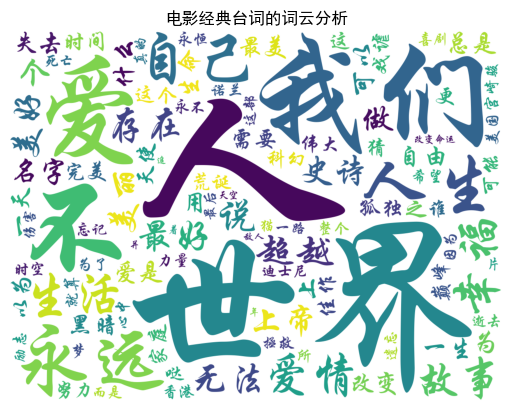

In [173]:
# 经典台词 词云
from  wordcloud import  WordCloud
import  matplotlib.pyplot as plt
import  jieba
import re
import collections
import  numpy as np

# sql = 'select quote from movie'
# quotes = execute_sql(sql, 1)
# text = ""
# for quote in quotes[0]:
#     text += quote

text = ""
for quote in movie['quote']:
    text += str(quote)


words = ''.join(text)
# 去除标点符号
quotes = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[！，;:%……&*（）]+", " ", words)
# lcut分割单词
words = jieba.lcut(quotes)
# 去除语气词及无意义词
del_words = [' ','的', '是', '不是', '它', '她', '他','你','我', '能', '不能','就是','多','那些','这些', 
             '一个', '被','就', '让', '在', '都','每个',  '不会', '中', '没有','大','小','与',
             '比', '一部', '啦','像', '会', '得', '里','对', '当', '比','和','跟','一样','一场',
             '走','这样', '那么', '不要', '如果', '来', '却', '一种', '而', '电影','版','好',
             '不过', '只有','有','只能' ,'不得不','不过', '再','也', '最', '了', '才', '给', '要']

words_final = []
for word in words:
    if word not in del_words:
        words_final.append(word)

result = collections.Counter(words_final)

cloud = WordCloud(
    font_path = 'STXINGKA.TTF',
    background_color = 'white',
    width = 1200,
    height = 900,
    max_words = 100   
)
wordcloud = cloud.generate_from_frequencies(result)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.title('电影经典台词的词云分析')
plt.show()


In [222]:
# 地区电影数 世界地图 / 热力图
from attachfile import name_map
from pyecharts.charts import Map

# sql =  'select name, sum(count) count from (select (case 	when name not like "中国%" then name    else "中国"   end ) name, count(*) count from place left outer join movie_place on place.id = movie_place.place_id group by name) as tmp group by name'
# place, count = execute_sql(sql, 2)

df = pd.merge(place, movie_place, left_on='id', right_on='place_id')
df['name'] = df['name'].map(lambda x : '中国' if x[:2] == '中国' else x )
df = df.groupby('name').agg({'name' : np.size})
df.columns = ['count']

_place = list(df.index)
count = [int(x) for x in df['count'].values]

map = (
    Map(init_opts=opts.InitOpts(width="1400px",height='600px'))  
    .add("电影地区分布", [list(z) for z in zip(_place, count)], "world", is_map_symbol_show=False, name_map=name_map) 
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        tooltip_opts=opts.TooltipOpts(
            trigger="item", formatter="{b}: {c} 部"
        )
    )  
    .set_global_opts(
        title_opts=opts.TitleOpts(title="电影地区分布",subtitle='单位: 部'),  
        visualmap_opts=opts.VisualMapOpts(),  
    )   
)
map.render_notebook()